In [105]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
norm = lambda x: np.linalg.norm(x)
fnorm = lambda x: np.linalg.norm(x,ord='fro')
plt.rcParams.update({'font.size': 15})

In [67]:
def isotropic_plus_minus_one (size):
    res = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            if np.random.uniform()<0.5: res[i][j]=1
            else: res[i][j]=-1
    return res

In [70]:
SNRs = [1,2.33,3.66,5]
sigma=1;n=200;n_samples=50
gamma1 = np.exp(np.linspace(np.log(0.1),0,30,endpoint=False))
gamma2 = np.exp(np.linspace(0.01,np.log(10),30))
gammas = np.concatenate((gamma1,gamma2))
theoretical_gammas = np.concatenate((np.linspace(0.1,0.99,1001),
                                     np.linspace(1.01,10,1001)))

In [71]:
risks_for_SNRs=[]
theoretical_risks_for_SNRs=[]
for SNR in SNRs:
    r = np.sqrt(SNR)
    risk1 = sigma**2*gamma1/(1-gamma1)
    risk2 = r**2*(1-1/gamma2)+sigma**2*(1/(gamma2-1))
    theoretical_risks = np.concatenate((risk1,risk2))
    theoretical_risks_for_SNRs.append(theoretical_risks)
    risks = np.zeros(len(gammas))
    for gamma_idx in tqdm(range(len(gammas))):
        gamma = gammas[gamma_idx]
        p = int(gamma*n)
        beta = np.random.multivariate_normal(np.zeros(p),np.eye(p))
        beta = r*beta/norm(beta)
        risk=np.zeros(n_samples)
        for sample_idx in range(n_samples):
            X = np.random.normal(size=(n,p))
            epsilon = np.random.normal(size=n)
            y = X@beta+epsilon
            beta_hat = np.linalg.pinv(X.transpose()@X)@X.transpose()@y
            risk[sample_idx]=norm(beta-beta_hat)**2
        risks[gamma_idx]=np.mean(risk)
    risks_for_SNRs.append(risks)
    print('SNR = ',SNR,' finished!')

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:35<00:00,  4.59s/it]


SNR =  1  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:27<00:00,  4.46s/it]


SNR =  2.33  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:29<00:00,  4.48s/it]


SNR =  3.66  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:28<00:00,  4.48s/it]

SNR =  5  finished!


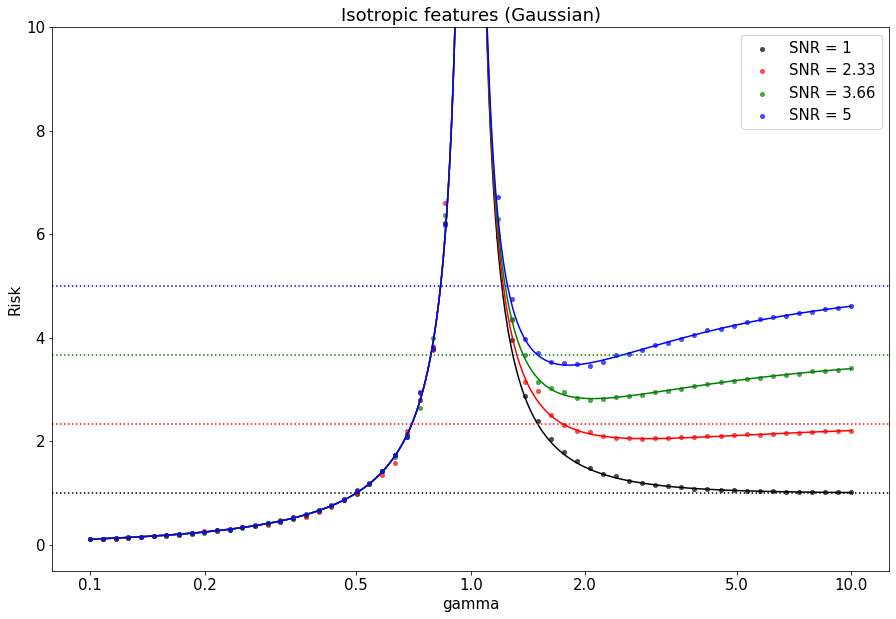

In [106]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gammas,risks_for_SNRs[0],linewidth = 0.5,
            color='k',s=20,alpha=0.7,label='SNR = 1')
plt.scatter(gammas,risks_for_SNRs[1],linewidth = 0.5,
            color='r',s=20,alpha=0.7,label='SNR = 2.33')
plt.scatter(gammas,risks_for_SNRs[2],linewidth = 0.5,
            color='g',s=20,alpha=0.7,label='SNR = 3.66')
plt.scatter(gammas,risks_for_SNRs[3],linewidth = 0.5,
            color='b',s=20,alpha=0.7,label='SNR = 5')

plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[0],color='k')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[1],color='r')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[2],color='g')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[3],color='b')

plt.axhline(y=SNRs[0], color='k', linestyle=':')
plt.axhline(y=SNRs[1], color='r', linestyle=':')
plt.axhline(y=SNRs[2], color='g', linestyle=':')
plt.axhline(y=SNRs[3], color='b', linestyle=':')


ax.set_xscale("log");
ax.set_ylim(-0.5,10)
plt.xticks([0.1,0.2,0.5,1.0,2.0,5.0,10.0],[0.1,0.2,0.5,1.0,2.0,5.0,10.0])
plt.tick_params(axis='x',which='minor',
                bottom=False,top=False,labelbottom=False) 
plt.title('Isotropic features (Gaussian)')
plt.xlabel('gamma')
plt.ylabel('Risk')
plt.legend()
plt.show()

In [73]:
for SNR in SNRs:
    r = np.sqrt(SNR)
    risk1 = sigma**2*gamma1/(1-gamma1)
    risk2 = r**2*(1-1/gamma2)+sigma**2*(1/(gamma2-1))
    theoretical_risks = np.concatenate((risk1,risk2))
    theoretical_risks_for_SNRs.append(theoretical_risks)
    risks = np.zeros(len(gammas))
    for gamma_idx in tqdm(range(len(gammas))):
        gamma = gammas[gamma_idx]
        p = int(gamma*n)
        beta = np.random.multivariate_normal(np.zeros(p),np.eye(p))
        beta = r*beta/norm(beta)
        risk=np.zeros(n_samples)
        for sample_idx in range(n_samples):
            X = isotropic_plus_minus_one((n,p))
            epsilon = np.random.normal(size=n)
            y = X@beta+epsilon
            beta_hat = np.linalg.pinv(X.transpose()@X)@X.transpose()@y
            risk[sample_idx]=norm(beta-beta_hat)**2
        risks[gamma_idx]=np.mean(risk)
    risks_for_SNRs.append(risks)
    print('SNR = ',SNR,' finished!')

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [12:13<00:00, 12.22s/it]


SNR =  1  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [11:57<00:00, 11.96s/it]


SNR =  2.33  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [12:08<00:00, 12.14s/it]


SNR =  3.66  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [12:18<00:00, 12.30s/it]

SNR =  5  finished!


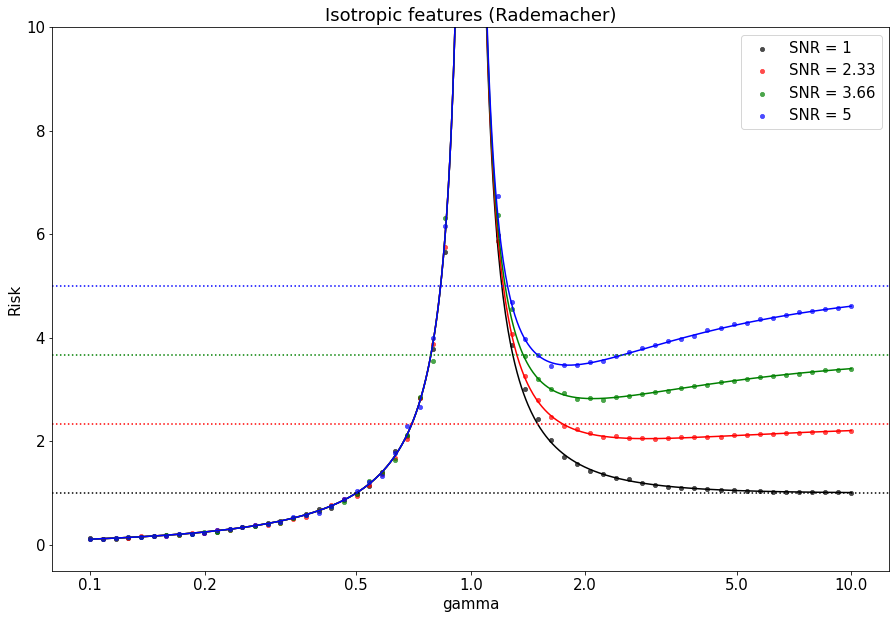

In [107]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gammas,risks_for_SNRs[4],linewidth = 0.5,
            color='k',s=20,alpha=0.7,label='SNR = 1')
plt.scatter(gammas,risks_for_SNRs[5],linewidth = 0.5,
            color='r',s=20,alpha=0.7,label='SNR = 2.33')
plt.scatter(gammas,risks_for_SNRs[6],linewidth = 0.5,
            color='g',s=20,alpha=0.7,label='SNR = 3.66')
plt.scatter(gammas,risks_for_SNRs[7],linewidth = 0.5,
            color='b',s=20,alpha=0.7,label='SNR = 5')

plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[4],color='k')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[5],color='r')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[6],color='g')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[7],color='b')

plt.axhline(y=SNRs[0], color='k', linestyle=':')
plt.axhline(y=SNRs[1], color='r', linestyle=':')
plt.axhline(y=SNRs[2], color='g', linestyle=':')
plt.axhline(y=SNRs[3], color='b', linestyle=':')

ax.set_xscale("log");
ax.set_ylim(-0.5,10)
plt.xticks([0.1,0.2,0.5,1.0,2.0,5.0,10.0],[0.1,0.2,0.5,1.0,2.0,5.0,10.0])
plt.tick_params(axis='x',which='minor',
                bottom=False,top=False,labelbottom=False) 
plt.title('Isotropic features (Rademacher)')
plt.xlabel('gamma')
plt.ylabel('Risk')
plt.legend()
plt.show()

What happens when we have 10% duplicate $x_i$?

In [94]:
for SNR in SNRs:
    r = np.sqrt(SNR)
    risk1 = sigma**2*gamma1/(1-gamma1)
    risk2 = r**2*(1-1/gamma2)+sigma**2*(1/(gamma2-1))
    theoretical_risks = np.concatenate((risk1,risk2))
    theoretical_risks_for_SNRs.append(theoretical_risks)
    risks = np.zeros(len(gammas))
    for gamma_idx in tqdm(range(len(gammas))):
        gamma = gammas[gamma_idx]
        p = int(gamma*n)
        n_duplicate = int(0.1*n); n_new = n-n_duplicate
        beta = np.random.multivariate_normal(np.zeros(p),np.eye(p))
        beta = r*beta/norm(beta)
        risk=np.zeros(n_samples)
        for sample_idx in range(n_samples):
            X = np.random.normal(size=(n_new,p))
            X_duplicate = X[np.random.choice(X.shape[0], n_duplicate, replace=False)]
            X = np.vstack((X,X_duplicate))
            epsilon = np.random.normal(size=n)
            y = X@beta+epsilon
            beta_hat = np.linalg.pinv(X.transpose()@X)@X.transpose()@y
            risk[sample_idx]=norm(beta-beta_hat)**2
        risks[gamma_idx]=np.mean(risk)
    risks_for_SNRs.append(risks)
    print('SNR = ',SNR,' finished!')

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:00<00:00,  4.01s/it]


SNR =  1  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:06<00:00,  4.10s/it]


SNR =  2.33  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:03<00:00,  4.05s/it]


SNR =  3.66  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [03:37<00:00,  3.63s/it]

SNR =  5  finished!


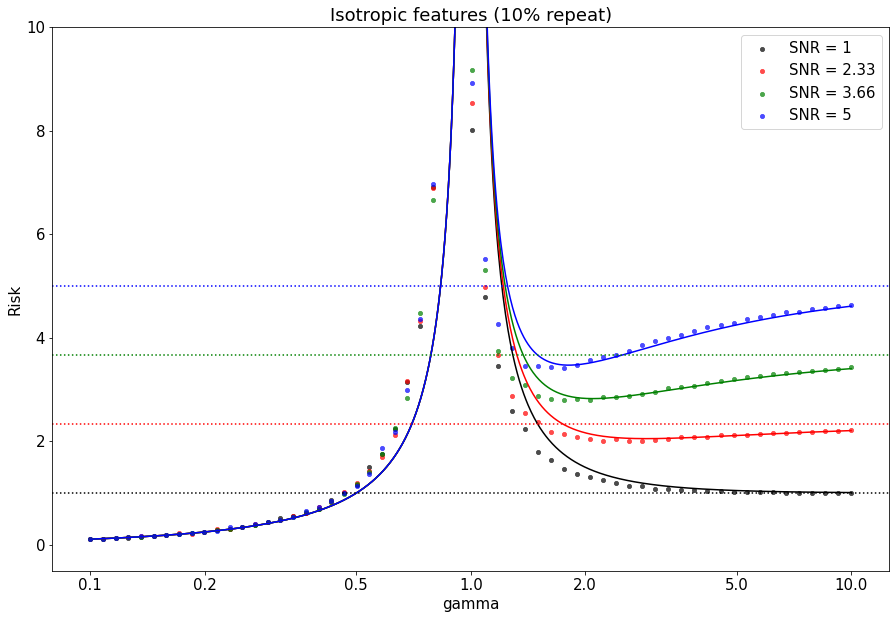

In [108]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gammas,risks_for_SNRs[8],linewidth = 0.5,
            color='k',s=20,alpha=0.7,label='SNR = 1')
plt.scatter(gammas,risks_for_SNRs[9],linewidth = 0.5,
            color='r',s=20,alpha=0.7,label='SNR = 2.33')
plt.scatter(gammas,risks_for_SNRs[10],linewidth = 0.5,
            color='g',s=20,alpha=0.7,label='SNR = 3.66')
plt.scatter(gammas,risks_for_SNRs[11],linewidth = 0.5,
            color='b',s=20,alpha=0.7,label='SNR = 5')

plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[0],color='k')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[1],color='r')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[2],color='g')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[3],color='b')

plt.axhline(y=SNRs[0], color='k', linestyle=':')
plt.axhline(y=SNRs[1], color='r', linestyle=':')
plt.axhline(y=SNRs[2], color='g', linestyle=':')
plt.axhline(y=SNRs[3], color='b', linestyle=':')

ax.set_xscale("log");
ax.set_ylim(-0.5,10)
plt.xticks([0.1,0.2,0.5,1.0,2.0,5.0,10.0],[0.1,0.2,0.5,1.0,2.0,5.0,10.0])
plt.tick_params(axis='x',which='minor',
                bottom=False,top=False,labelbottom=False) 
plt.title('Isotropic features (10% repeat)')
plt.xlabel('gamma')
plt.ylabel('Risk')
plt.legend()
plt.show()

What about 20% repeat?

In [96]:
for SNR in SNRs:
    r = np.sqrt(SNR)
    risk1 = sigma**2*gamma1/(1-gamma1)
    risk2 = r**2*(1-1/gamma2)+sigma**2*(1/(gamma2-1))
    theoretical_risks = np.concatenate((risk1,risk2))
    theoretical_risks_for_SNRs.append(theoretical_risks)
    risks = np.zeros(len(gammas))
    for gamma_idx in tqdm(range(len(gammas))):
        gamma = gammas[gamma_idx]
        p = int(gamma*n)
        n_duplicate = int(0.2*n); n_new = n-n_duplicate
        beta = np.random.multivariate_normal(np.zeros(p),np.eye(p))
        beta = r*beta/norm(beta)
        risk=np.zeros(n_samples)
        for sample_idx in range(n_samples):
            X = np.random.normal(size=(n_new,p))
            X_duplicate = X[np.random.choice(X.shape[0], n_duplicate, replace=False)]
            X = np.vstack((X,X_duplicate))
            epsilon = np.random.normal(size=n)
            y = X@beta+epsilon
            beta_hat = np.linalg.pinv(X.transpose()@X)@X.transpose()@y
            risk[sample_idx]=norm(beta-beta_hat)**2
        risks[gamma_idx]=np.mean(risk)
    risks_for_SNRs.append(risks)
    print('SNR = ',SNR,' finished!')

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [03:49<00:00,  3.83s/it]


SNR =  1  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [03:41<00:00,  3.69s/it]


SNR =  2.33  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [03:41<00:00,  3.69s/it]


SNR =  3.66  finished!


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [03:40<00:00,  3.68s/it]

SNR =  5  finished!


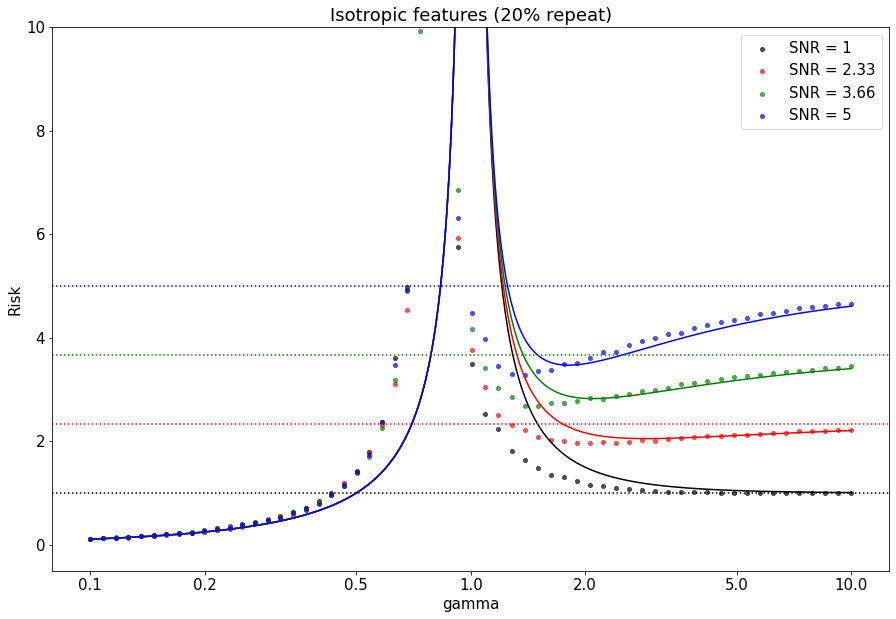

In [109]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gammas,risks_for_SNRs[12],linewidth = 0.5,
            color='k',s=20,alpha=0.7,label='SNR = 1')
plt.scatter(gammas,risks_for_SNRs[13],linewidth = 0.5,
            color='r',s=20,alpha=0.7,label='SNR = 2.33')
plt.scatter(gammas,risks_for_SNRs[14],linewidth = 0.5,
            color='g',s=20,alpha=0.7,label='SNR = 3.66')
plt.scatter(gammas,risks_for_SNRs[15],linewidth = 0.5,
            color='b',s=20,alpha=0.7,label='SNR = 5')

plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[0],color='k')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[1],color='r')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[2],color='g')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[3],color='b')

plt.axhline(y=SNRs[0], color='k', linestyle=':')
plt.axhline(y=SNRs[1], color='r', linestyle=':')
plt.axhline(y=SNRs[2], color='g', linestyle=':')
plt.axhline(y=SNRs[3], color='b', linestyle=':')

ax.set_xscale("log");
ax.set_ylim(-0.5,10)
plt.xticks([0.1,0.2,0.5,1.0,2.0,5.0,10.0],[0.1,0.2,0.5,1.0,2.0,5.0,10.0])
plt.tick_params(axis='x',which='minor',
                bottom=False,top=False,labelbottom=False) 
plt.title('Isotropic features (20% repeat)')
plt.xlabel('gamma')
plt.ylabel('Risk')
plt.legend()
plt.show()

What about not directly repeat, but add a small perturbation?

In [98]:
h = 0.1
for SNR in SNRs:
    r = np.sqrt(SNR)
    risk1 = sigma**2*gamma1/(1-gamma1)
    risk2 = r**2*(1-1/gamma2)+sigma**2*(1/(gamma2-1))
    theoretical_risks = np.concatenate((risk1,risk2))
    theoretical_risks_for_SNRs.append(theoretical_risks)
    risks = np.zeros(len(gammas))
    for gamma_idx in tqdm(range(len(gammas))):
        gamma = gammas[gamma_idx]
        p = int(gamma*n)
        n_duplicate = int(0.1*n); n_new = n-n_duplicate
        beta = np.random.multivariate_normal(np.zeros(p),np.eye(p))
        beta = r*beta/norm(beta)
        risk=np.zeros(n_samples)
        for sample_idx in range(n_samples):
            X = np.random.normal(size=(n_new,p))
            X_duplicate = X[np.random.choice(X.shape[0], n_duplicate, replace=False)]
            for i in range(n_duplicate):X_duplicate[i,:]=X_duplicate[i,:]+h*np.random.multivariate_normal(np.zeros(p),np.eye(p))
            X = np.vstack((X,X_duplicate))
            epsilon = np.random.normal(size=n)
            y = X@beta+epsilon
            beta_hat = np.linalg.pinv(X.transpose()@X)@X.transpose()@y
            risk[sample_idx]=norm(beta-beta_hat)**2
        risks[gamma_idx]=np.mean(risk)
    risks_for_SNRs.append(risks)
    print('SNR = ',SNR,' finished!')

100%|████████████████████████████████████████████████████████████████████████████████| 60/60 [1:17:13<00:00, 77.22s/it]


SNR =  1  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 60/60 [1:17:09<00:00, 77.16s/it]


SNR =  2.33  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 60/60 [1:16:57<00:00, 76.96s/it]


SNR =  3.66  finished!


100%|████████████████████████████████████████████████████████████████████████████████| 60/60 [1:16:48<00:00, 76.80s/it]

SNR =  5  finished!


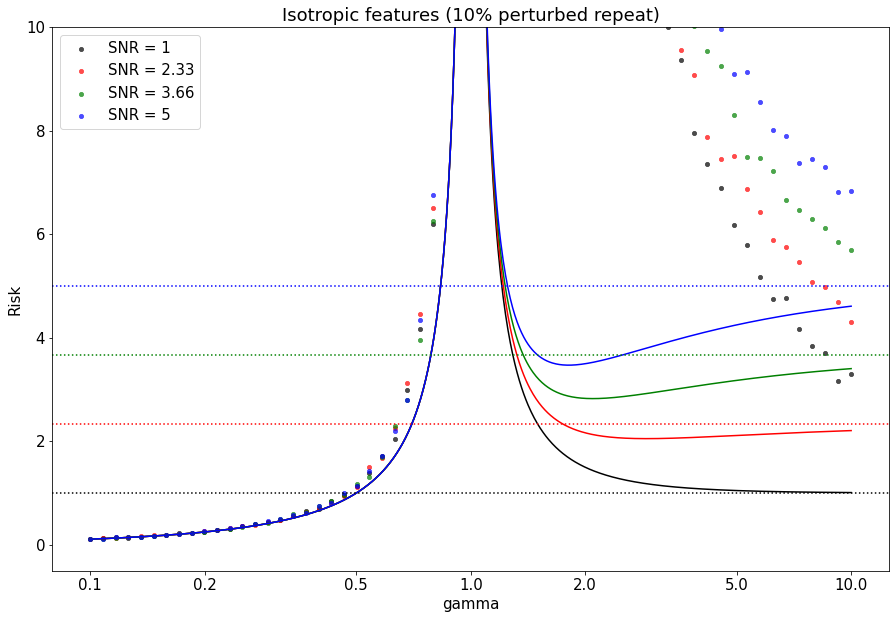

In [110]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gammas,risks_for_SNRs[16],linewidth = 0.5,
            color='k',s=20,alpha=0.7,label='SNR = 1')
plt.scatter(gammas,risks_for_SNRs[17],linewidth = 0.5,
            color='r',s=20,alpha=0.7,label='SNR = 2.33')
plt.scatter(gammas,risks_for_SNRs[18],linewidth = 0.5,
            color='g',s=20,alpha=0.7,label='SNR = 3.66')
plt.scatter(gammas,risks_for_SNRs[19],linewidth = 0.5,
            color='b',s=20,alpha=0.7,label='SNR = 5')

plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[0],color='k')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[1],color='r')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[2],color='g')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[3],color='b')

plt.axhline(y=SNRs[0], color='k', linestyle=':')
plt.axhline(y=SNRs[1], color='r', linestyle=':')
plt.axhline(y=SNRs[2], color='g', linestyle=':')
plt.axhline(y=SNRs[3], color='b', linestyle=':')

ax.set_xscale("log");
ax.set_ylim(-0.5,10)
plt.xticks([0.1,0.2,0.5,1.0,2.0,5.0,10.0],[0.1,0.2,0.5,1.0,2.0,5.0,10.0])
plt.tick_params(axis='x',which='minor',
                bottom=False,top=False,labelbottom=False) 
plt.title('Isotropic features (10% perturbed repeat)')
plt.xlabel('gamma')
plt.ylabel('Risk')
plt.legend()
plt.show()

In [100]:
h = 0.1
for SNR in SNRs:
    r = np.sqrt(SNR)
    risk1 = sigma**2*gamma1/(1-gamma1)
    risk2 = r**2*(1-1/gamma2)+sigma**2*(1/(gamma2-1))
    theoretical_risks = np.concatenate((risk1,risk2))
    theoretical_risks_for_SNRs.append(theoretical_risks)
    risks = np.zeros(len(gammas))
    for gamma_idx in tqdm(range(len(gammas))):
        gamma = gammas[gamma_idx]
        p = int(gamma*n)
        n_duplicate = int(0.2*n); n_new = n-n_duplicate
        beta = np.random.multivariate_normal(np.zeros(p),np.eye(p))
        beta = r*beta/norm(beta)
        risk=np.zeros(n_samples)
        for sample_idx in range(n_samples):
            X = np.random.normal(size=(n_new,p))
            X_duplicate = X[np.random.choice(X.shape[0], n_duplicate, replace=False)]
            for i in range(n_duplicate):X_duplicate[i,:]=X_duplicate[i,:]+h*np.random.multivariate_normal(np.zeros(p),np.eye(p))
            X = np.vstack((X,X_duplicate))
            epsilon = np.random.normal(size=n)
            y = X@beta+epsilon
            beta_hat = np.linalg.pinv(X.transpose()@X)@X.transpose()@y
            risk[sample_idx]=norm(beta-beta_hat)**2
        risks[gamma_idx]=np.mean(risk)
    risks_for_SNRs.append(risks)
    print('SNR = ',SNR,' finished!')

100%|███████████████████████████████████████████████████████████████████████████████| 60/60 [2:31:46<00:00, 151.77s/it]


SNR =  1  finished!


100%|███████████████████████████████████████████████████████████████████████████████| 60/60 [2:33:24<00:00, 153.42s/it]


SNR =  2.33  finished!


100%|███████████████████████████████████████████████████████████████████████████████| 60/60 [2:31:42<00:00, 151.71s/it]


SNR =  3.66  finished!


100%|███████████████████████████████████████████████████████████████████████████████| 60/60 [2:30:51<00:00, 150.87s/it]

SNR =  5  finished!


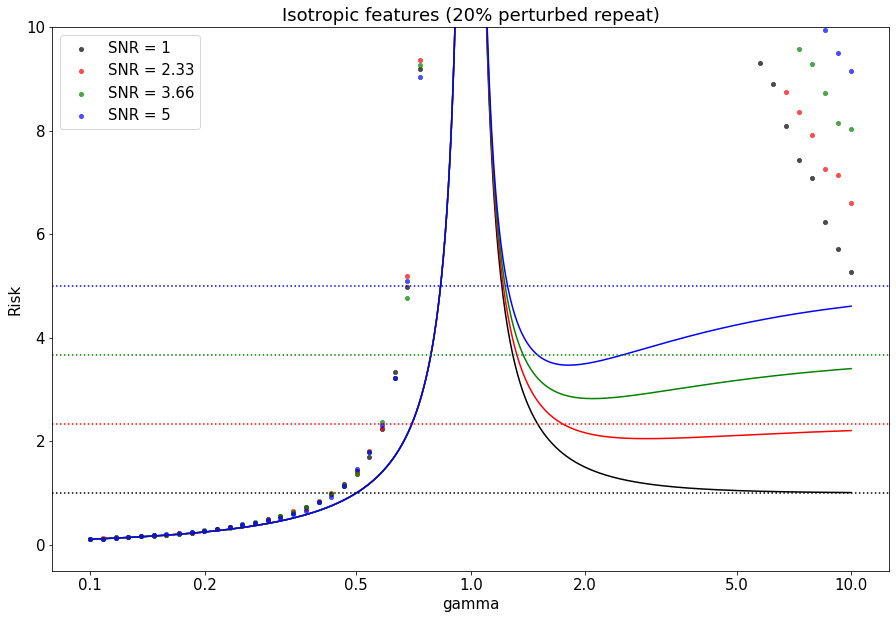

In [111]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gammas,risks_for_SNRs[20],linewidth = 0.5,
            color='k',s=20,alpha=0.7,label='SNR = 1')
plt.scatter(gammas,risks_for_SNRs[21],linewidth = 0.5,
            color='r',s=20,alpha=0.7,label='SNR = 2.33')
plt.scatter(gammas,risks_for_SNRs[22],linewidth = 0.5,
            color='g',s=20,alpha=0.7,label='SNR = 3.66')
plt.scatter(gammas,risks_for_SNRs[23],linewidth = 0.5,
            color='b',s=20,alpha=0.7,label='SNR = 5')

plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[0],color='k')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[1],color='r')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[2],color='g')
plt.plot(theoretical_gammas,theoretical_risks_for_SNRs[3],color='b')

plt.axhline(y=SNRs[0], color='k', linestyle=':')
plt.axhline(y=SNRs[1], color='r', linestyle=':')
plt.axhline(y=SNRs[2], color='g', linestyle=':')
plt.axhline(y=SNRs[3], color='b', linestyle=':')

ax.set_xscale("log");
ax.set_ylim(-0.5,10)
plt.xticks([0.1,0.2,0.5,1.0,2.0,5.0,10.0],[0.1,0.2,0.5,1.0,2.0,5.0,10.0])
plt.tick_params(axis='x',which='minor',
                bottom=False,top=False,labelbottom=False) 
plt.title('Isotropic features (20% perturbed repeat)')
plt.xlabel('gamma')
plt.ylabel('Risk')
plt.legend()
plt.show()

In [112]:
# save the data
# np.save('risks_for_SNRs',risks_for_SNRs)
# np.save('theoretical_risks_for_SNRs',theoretical_risks_for_SNRs)